Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514 / EEL7513 / EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$

# Exercício 7: Redes Profundas

Neste exercício você irá construir modelos de redes neurais para realizar classificação e experimentar diversas configurações de hiperparâmetros.

In [ ]:
import numpy as np # b
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
from sklearn.neural_network import MLPClassifier

import sys
import tensorflow as tf
print('Python version:', sys.version.split(' ')[0])
print('TensorFlow version:', tf.__version__)
print('GPU:', tf.config.list_physical_devices('GPU'))

Python version: 3.6.9
TensorFlow version: 2.4.1
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:

def plot_data(X, y, colors=['bo','rx','gs','md','c^','yP']):
    ''' Plot 1-D or 2-D classification dataset '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    classes = np.unique(y)
    assert len(classes) <= len(colors)
    dim = X.shape[1]
    assert 0 < dim <= 2
    if dim == 1:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],np.zeros(np.sum(y==classes[i])),colors[i])
        plt.gca().axes.get_yaxis().set_ticks([])
    else:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],X[y==classes[i],1],colors[i])
    return

def plot_boundary(model, X, colors=['b','r','g','m','c','y'], N=400, gap=1e-9):
    ''' Plot boundary for a 1-D or 2-D classifier '''
    assert len(X.shape) == 2
    dim = X.shape[1]
    assert 0 < dim <= 2
    x1_min, x1_max = X[:,0].min()-gap, X[:,0].max()+gap
    if dim == 1:
        x2_min, x2_max = -1, 1
        N2 = 2
    else:
        x2_min, x2_max = X[:,1].min()-gap, X[:,1].max()+gap
        N2 = N
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,N), np.linspace(x2_min,x2_max,N2))
    if dim == 1:
        X = np.c_[xx1.reshape(-1)]
    else:
        X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    y_pred = model.predict(X)
    from sklearn.preprocessing import LabelEncoder
    enc = LabelEncoder()
    y_pred = enc.fit_transform(y_pred)
    assert len(enc.classes_) <= len(colors)
    levels = np.arange(len(enc.classes_)+1)-0.5
    y_pred = y_pred.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_pred,levels,colors=colors,alpha=0.25)
    plt.contour(xx1,xx2,y_pred,levels,colors='k',linewidths=1)
    return
    #

# 1. Conjunto de dados #1

Para "aquecer", vamos começar utilizando o conjunto XOR do exercício anterior.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X_train, y_train = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y_train = (y_train >= 2).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(300, 2) (300,)
(100, 2) (100,)


1. Usando a biblioteca sklearn, treine uma rede neural de 2 camadas (1 oculta) para classificação. Utilize o otimizador Adam com parâmetros padrão, exceto pela taxa de aprendizado (constante), que deve ser escolhida apropriadamente. Obtenha 100% de acurácia de treinamento e de validação e calcule o valor da perda ao final do treinamento. Além disso, trace a curva da perda de treinamento ao longo das épocas.

#### Dicas
- Para obter a curva de perda no treinamento, você pode utilizar `model.loss_curve_`.
- Note que o sklearn usa uma terminologia por vezes inconsistente com a literatura da área (mas consistente internamente em sua API). Por exemplo, o parâmetro `max_iter` corresponde ao número de épocas, não necessariamente ao número de atualizações de pesos. Outro aspecto incômodo é juntar todos os hiperparâmetros do treinamento dentro da definição do modelo, o que além de tornar a chamada extensa, faz com que, dependendo da configuração, alguns parâmetros se tornem desnecessários ou mudem de definição.

# ~~ Resposta - Exercício 7.1.1 --

Train accuracy: 100.0%
Val accuracy: 100.0%
Loss 0.0043076396317532975



CPU times: user 149 ms, sys: 79.2 ms, total: 228 ms
Wall time: 154 ms


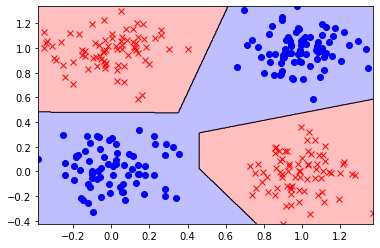

In [ ]:

%%time
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(6,),solver='adam',learning_rate_init=0.1,
                      learning_rate='constant',random_state=1)
model.fit(X_train,y_train)
plot_boundary(model,X_train)
plot_data(X_train,y_train)

print('Train accuracy: {:.1%}'.format(model.score(X_train,y_train)))
print('Val accuracy: {:.1%}'.format(model.score(X_val,y_val)))
print('Loss',model.loss_)
print ('\n\n')


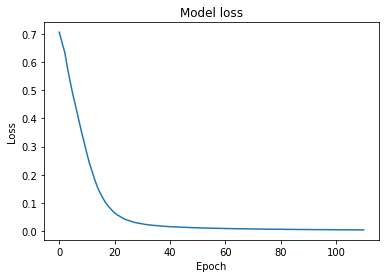

In [ ]:
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

2. Repita o item anterior usando [Keras](https://keras.io/), a API de alto-nível do [TensorFlow](https://www.tensorflow.org/), disponível através do módulo `tensorflow.keras`. Certifique-se de estar usando TensorFlow 2.x.


### Dicas
- Ao invés de instalar o TensorFlow e rodar localmente em sua máquina, uma opção mais simples é utilizar o serviço em nuvem gratuito [Google Colab](https://colab.research.google.com), que já possui todas as bibliotecas necessárias instaladas, inclusive o TensorFlow 2.x.

- Leia a documentação do Keras para aprender a utilizá-lo. Para quem está começando, é recomendável (e suficiente para este exercício) usar a classe [Sequential](https://keras.io/guides/sequential_model). É útil também conhecer sobre funções de [ativação](https://keras.io/activations), funções de [perda](https://keras.io/losses), métodos de [otimização](https://keras.io/api/optimizers) e o processo de [treinamento e avaliação](https://keras.io/guides/training_with_built_in_methods/) de modelos.
- No Keras, ao contrário do sklearn, é necessário especificar explicitamente a camada de saída, sua função de ativação, e a função de perda utilizada. (No sklearn, essa escolha é automática a partir dos valores encontrados em `y_train`.) 
- É recommendável utilizar o comando `model.summary()` para obter uma descrição de todas as camadas da rede neural.
- Para configurar a taxa de aprendizado, é necessário instanciar um otimizador, caso contrário será usado o valor padrão.
- Para obter a curva de perda no treinamento, utilize 
```python
history = model.fit(...)
history.history['loss']
```
- Se quiser garantir a reprodutibilidade, utilize `tf.random.set_seed()` **antes** de definir o modelo (os pesos são inicializados no momento da adição de cada camada).


# ~~ Resposta - Exercício 7.1.2 -

In [ ]:
#ensure reproducibility
import keras.backend as K
import random

def reset_seed():
   np.random.seed(1)
   random.seed(2)
   #if tf.__version__[0] == '2':
   tf.random.set_seed(3)
   #else:
    #   tf.set_random_seed(3)


In [ ]:
# creating model

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def first_model():
  #setting seed
  np.random.seed(42)

  #model layers
  model = Sequential()
  model.add(Dense(10,activation='linear',input_shape=X_train.shape[1:]))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  #Compiling Model
  model.compile(loss='binary_crossentropy',metrics=['accuracy'])
  return model
#checking model
model = first_model()
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


Train accuracy: 100.0%
  Val accuracy: 100.0%
Loss: 0.012352203


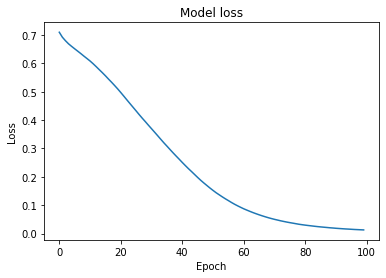

In [ ]:
import tensorflow as tf
#%%time
#Enseure Reproducibility
model=1
del model
K.clear_session()
reset_seed()
#creating model
model = first_model()

#training model
history = model.fit(X_train,y_train,epochs = 100, verbose = 0,validation_data=(X_val,y_val))

acc_train = model.evaluate(X_train,y_train,verbose=0)
acc_val = model.evaluate(X_val,y_val,verbose=0)

print('Train accuracy: {:.1%}'.format(acc_train[1]))
print('  Val accuracy: {:.1%}'.format(acc_val[1]))
print('Loss: {:.8}'.format(acc_train[0]))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# 2. Conjunto de dados #2

A partir de agora, desenvolva seus modelos de aprendizado profundo utilizando o Keras/TensorFlow, o qual possui muito mais recursos do que o sklearn e é mais otimizado para desempenho.

O segundo conjunto de dados é o conjunto de dígitos manuscritos [MNIST](https://en.wikipedia.org/wiki/MNIST_database), o qual possui 70000 amostras, sendo 10000 amostras de teste. Este é um conjunto clássico e -- embora não seja mais recomendado para avaliação do estado da arte -- ainda vastamente utilizado para experimentação e aprendizado. O conjunto pode ser facilmente carregado pelos comandos abaixo.

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Observe a diferença na notação convencional quando usamos o Keras (ou qualquer outro *framework* de aprendizado profundo): `x` (minúsculo) ao invés de `X` (maiúsculo). Isto ocorre porque o Keras nos permite trabalhar diretamente com os dados em seu formato original, neste caso, como um tensor 3D. Portanto, não é necessário redimensionar (*reshape*) os dados antes de aplicar o modelo, assim como perde o sentido usar uma notação especial para denotar uma matriz (tensor 2D).

Caso seja necessário redimensionar os dados em algum estágio do modelo, isso pode ser feito internamente com camadas do Keras. Em particular, para redimensionar para o formato convencional de tensor 2D `(n_samples, n_features)`, pode ser usada a camada `Flatten`. Isto é sempre necessário antes de aplicar uma camada `Dense`, a qual só opera na última dimensão. No nosso caso, as duas dimensões (28,28) serão "achatadas" em uma única de (784,):

In [ ]:
import keras.backend as K
import tensorflow as tf
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.layers import Flatten,Input
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


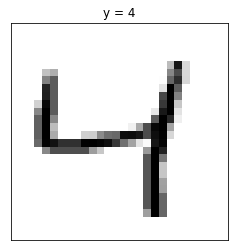

In [ ]:
# Exemplo de uma imagem
i = 2
plt.imshow(x_train[i], cmap=plt.cm.gray_r);
plt.title('y = {}'.format(y_train[i]));
plt.xticks([]);
plt.yticks([]);

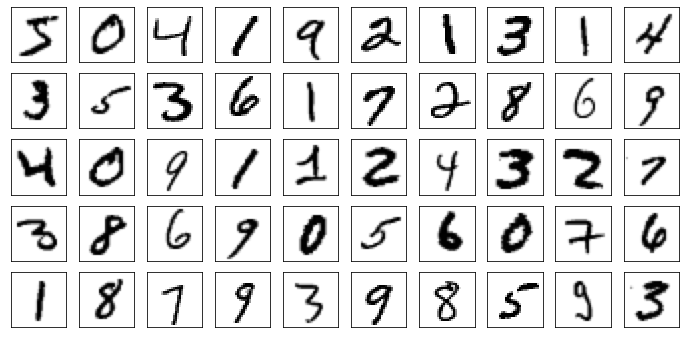

In [ ]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.gray_r);
    plt.xticks([]);
    plt.yticks([]);

## Tarefas

1. Separe um conjunto de validação com 5000 amostras (por exemplo, as últimas 5000 amostras do conjunto de treinamento). Confirme que a distribuição das classes é parecida com a do conjunto de treinamento (não precisa ser exatamente igual).

#### Dica
- Para calcular e visualizar um histograma, você pode utilizar a função `plt.hist()`, opcionalmente definindo os parâmetros `density` e `alpha`, entre outros.

In [ ]:
#ensure reproducibility
import keras.backend as K
import random

def reset_seed():
   np.random.seed(1)
   random.seed(2)
   #if tf.__version__[0] == '2':
   tf.random.set_seed(3)
   #else:
    #   tf.set_random_seed(3)

# ~~ Resposta - Exercício 7.2.1 -

---------- Shape Validation -----------
 (5000, 28, 28) (5000,) 
 
---------- Shape Train ---------------
 (55000, 28, 28) (55000,) 
 
--------------------------------------



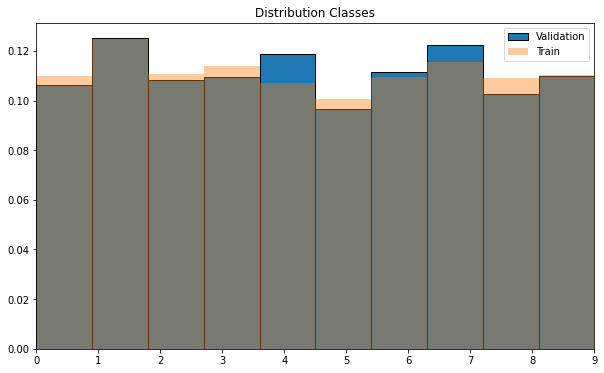

In [ ]:
# Splitting 50000 data

x_val = x_train[:5000,:,:]
x_train_new = x_train[5000:,:,:]
y_val = y_train[:5000]
y_train_new = y_train[5000:]

#Checking Shape

print('---------- Shape Validation -----------\n',
      x_val.shape,y_val.shape,'\n',
      '\n---------- Shape Train ---------------\n',
      x_train_new.shape,y_train_new.shape,'\n',
      '\n--------------------------------------\n')

#Distribution Classes

plt.figure(figsize=(10,6))
plt.hist(y_val,bins=10,density=True,alpha=1, label='Validation',edgecolor='black')
plt.hist(y_train_new,bins=10,density=True,alpha=0.4,label='Train')
plt.xlim(0,9.0)
plt.title('Distribution Classes')
plt.legend()
plt.show() #2



###  ------- Resposta 7.2.1 : A distibuição de classes é semelhante.

# ~~ Resposta - Exercício 7.2.2 -

In [ ]:
#--------------------------------7.2.2
# Getting 10000 samples
x_train_base = x_train_new[:10000,:,:]
y_train_base = y_train_new[:10000]
print(x_train_base.shape,y_train_base.shape)


(10000, 28, 28) (10000,)


In [ ]:
#--------------------------------7.2.2
#Compiling and creating model
def base_model():
  #setting seed
  np.random.seed(42)
  #model layers
  model = Sequential()
  model.add(Input(shape=(28,28)))

  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))

  # Compiling Model
  model.compile(loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

#Checking model
model = base_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#--------------------------------7.2.2
%%time
#Ensure Reproducibility
del model 
K.clear_session()
reset_seed()

#creating model 
model = base_model()
#Training model
model.fit(x=x_train_new,
          y=y_train_new,
          epochs=10,
          batch_size=512,
          verbose = 1)

Epoch 1/10
108/108 [==============================] - 1s 2ms/step - loss: 1.4628 - accuracy: 0.6056
Epoch 2/10
108/108 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.8687
Epoch 3/10
108/108 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8915
Epoch 4/10
108/108 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.9075
Epoch 5/10
108/108 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.9097
Epoch 6/10
108/108 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.9142
Epoch 7/10
108/108 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.9192
Epoch 8/10
108/108 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.9179
Epoch 9/10
108/108 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.9202
Epoch 10/10
108/108 [==============================] - 0s 3ms/step - loss: 0.2811 - accuracy: 0.9224

# ~~ Resposta - Exercício 7.2.3 -

In [ ]:
def training_model(lr=0.005):

  #setting seed
  np.random.seed(42)
  #model layers
  model = Sequential()
  model.add(Input(shape=(28,28)))
  model.add(Flatten())
  model.add(Dense(400,activation='relu'))

  #model.add(Dense(256,activation='relu'))
  #model.add(Dense(80,activation='relu'))

  model.add(Dense(63,activation='elu'))
  model.add(Dense(10,activation='softmax'))

  #setting optmizer learning rate
  opt = Adam(learning_rate = lr)

  # Compiling Model
  model.compile(optimizer = opt, 
                loss= 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

#Checking model
model = training_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 63)                25263     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                640       
Total params: 339,903
Trainable params: 339,903
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%time
#aaaaa
#ensure reprodutibility
del model
K.clear_session()
reset_seed()

#creating model 
model = training_model(lr=0.005) #0.003 #0.0038538
#training model
model.fit(x = x_train_base,
          y=y_train_base,
          epochs=11,
            batch_size = 512, #160 #500
          verbose = 1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
Epoch 1/11
20/20 [==============================] - 0s 3ms/step - loss: 1.2169 - accuracy: 0.5952
Epoch 2/11
20/20 [==============================] - 0s 3ms/step - loss: 0.2784 - accuracy: 0.9212
Epoch 3/11
20/20 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9536
Epoch 4/11
20/20 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9740
Epoch 5/11
20/20 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9857
Epoch 6/11
20/20 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9877
Epoch 7/11
20/20 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9948
Epoch 8/11
20/20 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9980
Epoch 9/11
20/20 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9992
Epoch 10/11
20/20 [==============================] - 0

# ~~ Resposta - Exercício 7.2.4 -

* A redução do `batch_size` de fato tornou a execução mais lenta e levou a um desempenho melhor a cada época percorrida;

* Há grande indluência do `learning_rate` sobre a acurácia; Valores altos impedem o modelo de "crescer" seu desempnho através das épocas. Enquanto isso, valores muito  baixos levam a um desempenho ruim;

* A primeira camada tem grande influência sobre o modelo; o crescimento no número de camadas provoca pouco ganho de desempenho, sendo que um pequeno número de camadas já é suficiente para se obter bom desempenho.

* o uso da função de ativação `elu` na penúltima camada da rede provocou uma pequena melhora no desempenho do modelo, em comparação ao uso da função de ativação `relu` para a mesma camada;

* A ativação `softmax` na camada final do modelo provoca uma considerável melhora de desempenho no modelo; A função `sigmoid` na camada final também resultou em um bom desempenho

2. Para desenvolvimento do modelo, considere um subconjunto de treinamento com poucas amostras, por exemplo, as primeiras 10000, e também um número pequeno de épocas, por exemplo, 10. Isso vai permitir uma rápida experimentação. Uma vez finalizado o desenvolvimento, você poderá aumentar esses valores. Inicialmente, construa um modelo **baseline** sem nenhuma camada oculta, treine-o e confirme que está funcionando corretamente.
1. Por hora, ignore o conjunto de validação. Tente obter 100% de acurácia de treinamento (com o conjunto reduzido) e apenas 10 épocas. O objetivo é garantir que o modelo possui capacidade suficiente para este problema. Fique à vontade para variar quaisquer hiperparâmetros do modelo ou do treinamento, mas utilize apenas conceitos já abordados na disciplina (i.e., não utilize camadas convolucionais). Tenha em mente as seguintes observações:
 - A taxa de aprendizado é provavelmente o hiperparâmetro mais importante, no sentido de que, mesmo que você consiga supostamente encontrar os melhores valores de todos os demais hiperparâmetros (inclusive da arquitetura do modelo), ainda assim o modelo poderá ter um desempenho ruim se a taxa de aprendizado não for ajustada adequadamente.
 - Em geral, cada modificação em algum hiperparâmetro pode exigir um novo ajuste da taxa de aprendizado (i.e., o seu valor ótimo pode mudar), embora alguns hiperparâmetros tenham um impacto maior do que outros.
 - O batch size tem um impacto grande na velocidade do treinamento, além de impactar no desempenho do modelo. De maneira geral, aumentar o batch size reduz o tempo de treinamento de uma época (por quê?), mas pode piorar o desempenho para um número fixo de épocas (por quê?). Assim, uma recomendação básica é utilizar o maior batch size possível tal que o desempenho do modelo (para um número fixo de épocas) não apresente degradação significativa. Minimizar o tempo de treinamento é essencial para uma rápida experimentação.
 - Naturalmente, o desempenho ótimo para cada valor de batch size envolve um ajuste da taxa de aprendizado. Uma regra prática (empírica) é: se o batch size é multiplicado por um fator F, então, para obter um desempenho semelhante, a taxa de aprendizado também deve ser multiplicada por F. Note que essa regra não é exata, mas serve como um bom ponto de partida.
1. Relate suas principais observações sobre quais abordagens foram bem sucedidas ou não.

#### Dicas
- Para um problema multi-classe com codificação compacta $y \in \{0,1,\ldots,9\}$ (i.e., que **não** é *one-hot encoding*), a função perda adequada é a `'sparse_categorical_crossentropy'`. Nesse caso não é necessário codificar como *one-hot*.
- O Keras permite monitorar, durante o treinamento, não apenas a perda, mas também outras métricas, como a acurácia, tanto de treinamento quanto de validação. Para isso, configure o parâmetro `metrics` ao executar `model.compile`. As curvas estarão disponíveis no parâmetro history.
- Para avaliar o efeito de um hiperparâmetro, é muito útil garantir que não há outras fontes de "ruído" ou variação, assim cada hiperparâmetro pode ser avaliado isoladamente. Em particular, a inicialização dos pesos do modelo deve ser determinística. Para isso, utilize `tf.random.set_seed()` antes de definir o modelo. Isso também garante a reprodutibilidade dos resultados, caso você precise executar o treinamento novamente.
- Para medir o tempo de execução de uma célula do notebook, utilize `%%time` na primeira linha da célula.
- É usual (e tipicamente suficiente) variar o batch size em potências de 2.
- Se desejar utilizar a GPU do Colab para acelerar o treinamento, selecione-a no menu *Runtime/Change runtime type*. Para os modelos deste exercício, porém, o ganho computacional provavelmente não será tão expressivo. Note também que é possível que a inicialização de pesos seja diferente de quando o modelo é executado sem GPU, ainda que a mesma *random seed* tenha sido definida.

# ~~ Resposta - Exercício 7.2.5 -

In [ ]:
# Loading Tensorboard notebook extension
%load_ext tensorboard
import datetime

In [ ]:


#%%time
#Ensure Reproducibility
model = 1
del model
K.clear_session()
reset_seed()

# Creating model
model = training_model()

#clear any logs from previous runs
!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)
#epochs
#Fitting Model, analizing Validation Data
model.fit(x = x_train_base,
          y = y_train_base,
          epochs=12,
          batch_size=512,
          verbose=0,
          validation_data=(x_val,y_val),
          callbacks = [tensorboard_callback]
          )

In [ ]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9f9a3b4358>>

In [ ]:
#plotting curves

#%tensorboard --logdir logs/fit

# Figura obtida no tensorflow (a aplicação precisou ser retirada pois ela estava
# de alguma forma estava prejudicando o salvamento do arquivo. Os mesmos dados 
# podem ser obtidos rodando o comando acima (%tensorboard --logdir logs/fit)
# )

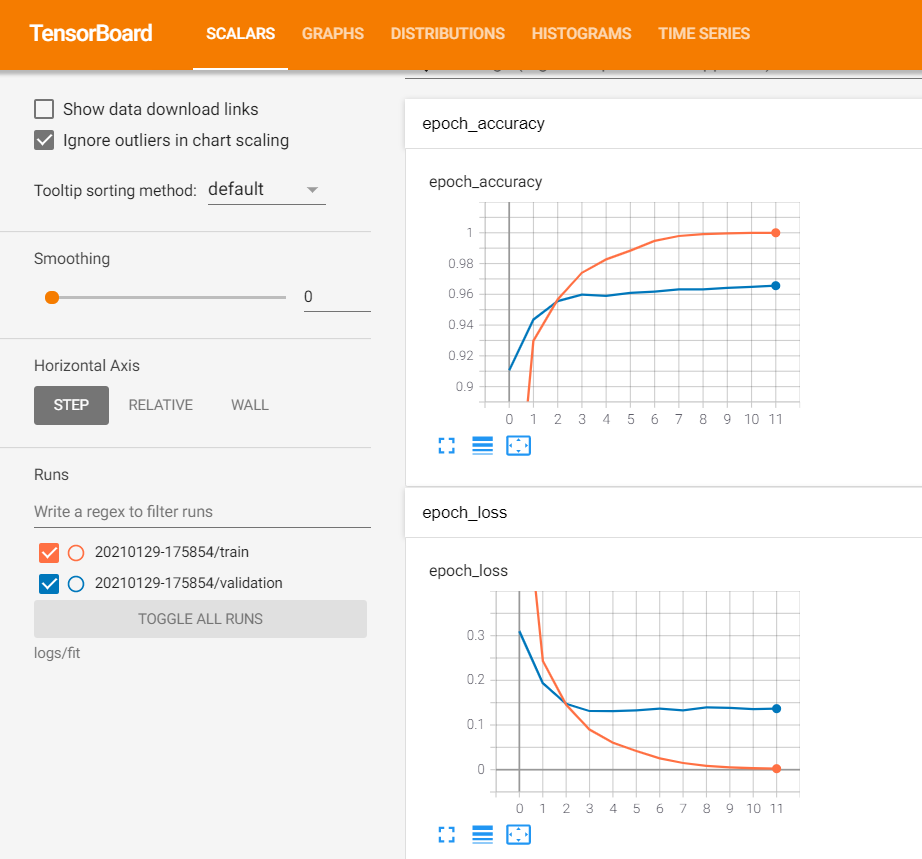

# ~~ Resposta - Exercício 7.2.6 -

In [1]:
# 1.  ------------ Loading Data -----------

# Recarregando dataset :
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Splitting 50000 data

x_val = x_train[:5000,:,:]
x_train_new = x_train[5000:,:,:]
y_val = y_train[:5000]
y_train_new = y_train[5000:]

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
# tutorial : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

#--------------------------------


import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten
from  tensorflow.keras.optimizers import Adam

#Compiling and creating model
def make_model6():

  #setting seed
  np.random.seed(42)

#  ------------ 2. Define Keras Model - model layers
  model = Sequential()
  model.add(Input(shape=(28,28)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  #setting optimizer
  opt= Adam(learning_rate=0.01)

#  ------------ 3. Compile Keras Model - Compiling Model
  model.compile(optimizer = opt,
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

#Checking model
model = make_model6()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [3]:
def reset_seed():
   np.random.seed(1)
   random.seed(2)
   tf.random.set_seed(3)

In [7]:
import tensorflow as tf
import keras.backend as K
import numpy as np
import random,datetime
#%load_ext tensorboard

#Ensure Reproducibility
model = 1
del model
K.clear_session()
reset_seed()

# Creating model
model = make_model6()

# ------------ 4. Fit Keras Model
#Fitting Model, analizing Validation Data

model.fit(x = x_train_new,
          y = y_train_new,
          epochs=10,
          batch_size=2048,
          verbose=0
          ,validation_data=(x_val,y_val)
         
          )

In [8]:
epocas= range(1,13)

v_loss = np.zeros((max(epocas),2))
v_acc = np.zeros((max(epocas),2))

for i in epocas:
  model.fit(x = x_train_new,
            y = y_train_new,
            epochs=i,
            batch_size=2048,
            verbose=0
            );
  v_loss[i-1,0],v_acc[i-1,0] = model.evaluate(x_train,y_train)
  v_loss[i-1,1],v_acc[i-1,1] = model.evaluate(x_val,y_val)


print(list(epocas));


157/157 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9850
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [9]:
model.evaluate(x_train_new,y_train_new)
model.evaluate(x_val,y_val)

157/157 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9850


[0.10758490115404129, 0.9850000143051147]

In [10]:
epc=np.asarray(epocas)
print("Accuracy: \n")
print("Train             |   Validation")
print("_____________________________________")
for line in v_acc:
    print(*line)

Accuracy: 

Train             |   Validation
_____________________________________
0.9975666403770447 0.9832000136375427
0.9974499940872192 0.9796000123023987
0.9968833327293396 0.9805999994277954
0.9961333274841309 0.978600025177002
0.9977499842643738 0.9807999730110168
0.9977499842643738 0.9807999730110168
0.9977666735649109 0.9829999804496765
0.9986333250999451 0.9837999939918518
0.9987333416938782 0.9847999811172485
0.9987333416938782 0.9847999811172485
0.9987666606903076 0.9851999878883362
0.9987499713897705 0.9850000143051147


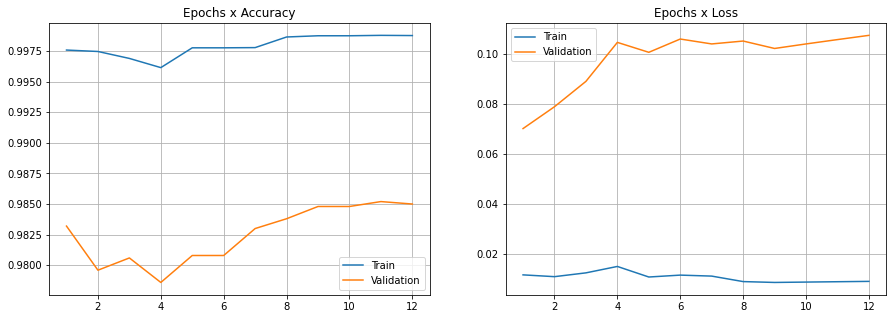

In [11]:
import matplotlib.pyplot as plt



plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(epocas,v_acc)

plt.legend(["Train","Validation"])
plt.title("Epochs x Accuracy");
plt.grid()

plt.subplot(1,2,2)
plt.plot(epocas,v_loss)
plt.legend(["Train","Validation"]);
plt.title("Epochs x Loss");
plt.grid()
plt.show()

# --------------

# ~~ Resposta - Exercício 7.2.7 -

In [12]:
def reset_seed():
   np.random.seed(1)
   random.seed(2)
   tf.random.set_seed(3)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten
from  tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
import numpy as np
import random,datetime



#Compiling and creating model
def make_model6():

  #setting seed
  np.random.seed(42)

#  ------------ 2. Define Keras Model - model layers  #A ) Mantém hiperparâmetros
  model = Sequential()
  model.add(Input(shape=(28,28)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  #setting optimizer
  opt= Adam(learning_rate=0.01)

#  ------------ 3. Compile Keras Model - Compiling Model
  model.compile(optimizer = opt,
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

#Checking model
model = make_model6()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Recarregando dataset :
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Splitting 50000 data #b ) alterar tamanho do conjunto de treino

x_val = x_train[:5000,:,:]
x_train_new = x_train[5000:,:,:]
y_val = y_train[:5000]
y_train_new = y_train[5000:]

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
# I) 30 epochs accuracy by samples

import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
import numpy as np
import random,datetime


sample = np.arange(1000,55000,1000)
plt.figure(figsize=(18,6))

best_epoch = []
acc_train=[]
max_val = []


for i in range(len(sample)):
  x_train_p = x_train_new[:sample[i],:,:]
  y_train_p = y_train_new[:sample[i]]

  #Ensure Reproducibility
  model = 1
  del model
  K.clear_session()
  reset_seed()

  model = make_model6()
  history = model.fit(x = x_train_p,
              y = y_train_p,
              epochs=30,
              batch_size=2048,
              verbose=0,
              validation_data=(x_val,y_val)
              )
  max_val.append(history.history['val_accuracy'][-1])
  acc_train.append(max(history.history['accuracy']))
  best_epoch.append(history.history['val_accuracy'].index(max(history.history['val_accuracy']))+1)



<Figure size 1296x432 with 0 Axes>

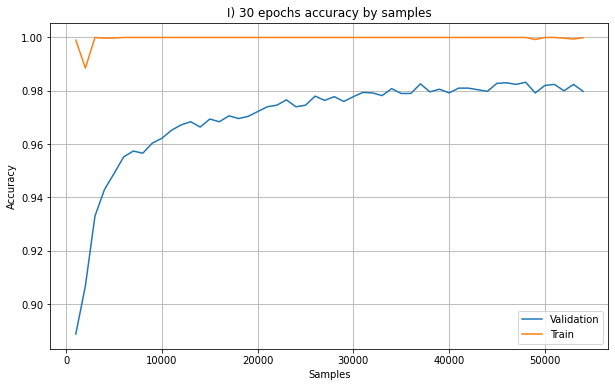

In [16]:
plt.figure(figsize=(10,6))
plt.plot(sample,max_val,label='Validation')
plt.plot(sample,acc_train,label='Train')
plt.grid(True)

plt.title('I) 30 epochs accuracy by samples')
plt.ylabel('Accuracy')
plt.xlabel('Samples')
plt.legend()

plt.show()

In [17]:
history.history['val_accuracy'][-1]

0.9797999858856201

In [18]:


# - -----------------------

import matplotlib.pyplot as plt

sample = np.arange(1000,55000,1000)
plt.figure(figsize=(18,6))

best_epoch = []
acc_train=[]
max_val = []


for i in range(len(sample)):
  x_train_p = x_train_new[:sample[i],:,:]
  y_train_p = y_train_new[:sample[i]]

  #Ensure Reproducibility
  model = 1
  del model
  K.clear_session()
  reset_seed()

  model = make_model6()
  history = model.fit(x = x_train_p,
              y = y_train_p,
              epochs=30,
              batch_size=2048,
              verbose=0,
              validation_data=(x_val,y_val)
              )
  max_val.append(max(history.history['val_accuracy']))
  acc_train.append(max(history.history['accuracy']))
  best_epoch.append(history.history['val_accuracy'].index(max(history.history['val_accuracy']))+1)



<Figure size 1296x432 with 0 Axes>

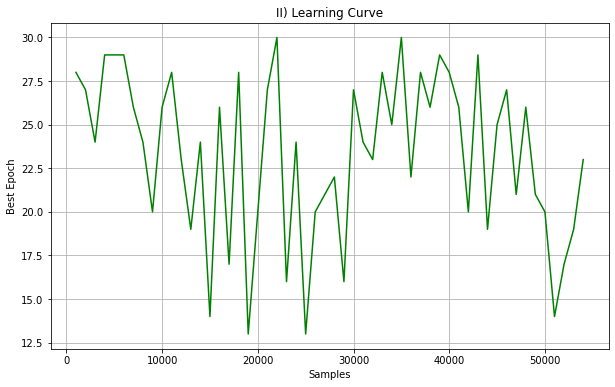

Best Epochs mean:  23.333333333333332


In [19]:
# II) Learning Curve

plt.figure(figsize=(10,6))
plt.plot(sample,best_epoch,color='green')
plt.grid(True)

plt.title('II) Learning Curve')
plt.ylabel('Best Epoch')
plt.xlabel('Samples')


plt.show()
print ("Best Epochs mean: ",np.mean(best_epoch) )

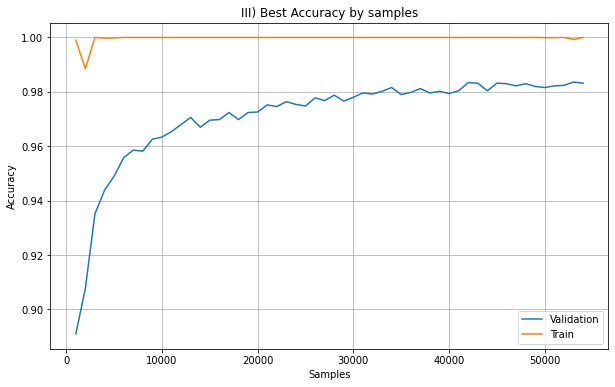

In [20]:
#III) Best Accuracy by samples

plt.figure(figsize=(10,6))
plt.plot(sample,max_val,label='Validation')
plt.plot(sample,acc_train,label='Train')

plt.grid(True)

plt.title('III) Best Accuracy by samples')
plt.ylabel('Accuracy')
plt.xlabel('Samples')
plt.legend()

plt.show()

7.2.7 - Conclusão : Pela Learning Curve obtida na figura II deste exercício, foi econtrado o valor médio aproximado de 23 épocas (Best Epochs mean: 23.09259259259259) como o de melhor desempenho para o modelo.



# ~~ Resposta - Exercício 7.2.8 -

In [21]:

# 1.  ------------ Loading Data -----------

# Recarregando dataset :
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Splitting 50000 data

x_val = x_train[:5000,:,:]
x_train_new = x_train[5000:,:,:]
y_val = y_train[:5000]
y_train_new = y_train[5000:]

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [22]:
# tutorial : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

#--------------------------------


import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten
from  tensorflow.keras.optimizers import Adam

#Compiling and creating model
def make_model8():

  #setting seed
  np.random.seed(42)

#  ------------ 2. Define Keras Model - model layers
  model = Sequential()
  model.add(Input(shape=(28,28)))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10,activation='softmax'))

  #setting optimizer
  opt= Adam(learning_rate=0.01)

#  ------------ 3. Compile Keras Model - Compiling Model
  model.compile(optimizer = opt,
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])
  return model

#Checking model
model = make_model8()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


In [23]:
def reset_seed():
   np.random.seed(1)
   random.seed(2)
   #if tf.__version__[0] == '2':
   tf.random.set_seed(3)
   #else:
    #   tf.set_random_seed(3)


In [24]:
import tensorflow as tf
import keras.backend as K
import numpy as np
import random,datetime
%load_ext tensorboard



#%%time
#Ensure Reproducibility
model = 1
del model
K.clear_session()
reset_seed()

# Creating model
model = make_model8()

#clear any logs from previous runs
#!rm -rf ./logs/

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)

# ------------ 4. Fit Keras Model
#Fitting Model, analizing Validation Data
model.fit(x = x_train,
          y = y_train,
          epochs=30,
          batch_size=2048,
          verbose=1
          )

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/30
30/30 [==============================] - 0s 6ms/step - loss: 1.3030 - accuracy: 0.5998
Epoch 2/30
30/30 [==============================] - 0s 6ms/step - loss: 0.1818 - accuracy: 0.9457
Epoch 3/30
30/30 [==============================] - 0s 6ms/step - loss: 0.1073 - accuracy: 0.9685
Epoch 4/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0789 - accuracy: 0.9757
Epoch 5/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0544 - accuracy: 0.9831
Epoch 6/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0453 - accuracy: 0.9860
Epoch 7/30
30/30 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.9890
Epoch 8/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0257 - accuracy: 0.9922
Epoch 9/30
30/30 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9946
Epoch 10/30
30/30 [=========

In [25]:
scores = model.evaluate(x_test, y_test, verbose=1)
#print("loss: ",scores,"\n score: ",

313/313 [==============================] - 1s 2ms/step - loss: 0.1294 - accuracy: 0.9793


# ~~ Resposta - Exercício 7.2.9 -

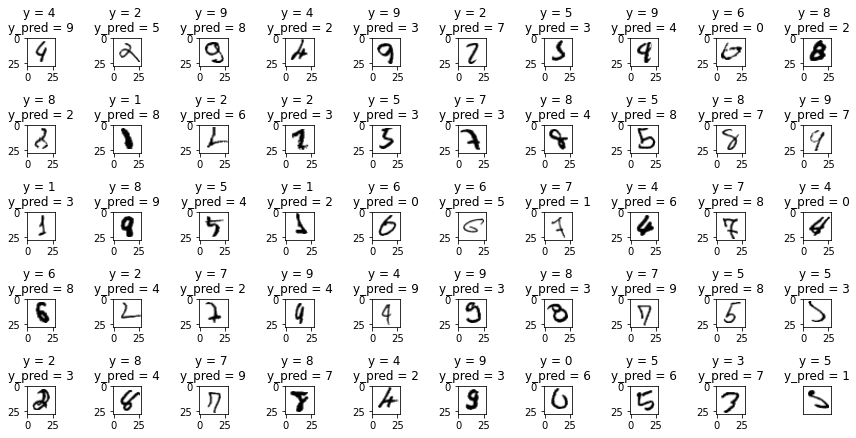

In [26]:
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(x_test),axis=-1)
errors = y_pred != y_test

plt.figure(figsize=(12,12))
for idx in range(50):
  plt.subplot(10,10,idx+1)
  x = x_test [errors][idx].reshape(28,28)
  y = y_test[errors][idx]

  plt.gcf().set_facecolor('w')
  plt.tight_layout()
  plt.imshow(x,cmap=plt.cm.gray_r);
  plt.title(f'y = {y} \ny_pred = {y_pred[errors][idx]}')

plt.xticks([]);
plt.yticks([]);

# ~~ Resposta - Exercício 7.2.10 -

In [27]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

W = model.weights[0].numpy()
vmax = np.abs(W).max()
@interact(i=(0,int(np.ceil(W.shape[1]/10))-1))
def _(i=0):
  plt.figure(figsize=(16,2.4));
  # para ver de 10 em 10
  for j in range(min(10, W.shape[1]-10*i)):
    plt.subplot(1,10,j+1)
    w = W[:,10*i+j].reshape(28,28)
    plt.imshow(w, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax); # (-,0,+) = (blue, white, red)
    plt.xticks([]);
    plt.yticks([]);

interactive(children=(IntSlider(value=0, description='i', max=51), Output()), _dom_classes=('widget-interact',…

5. Agora, monitore também a acurácia de validação ao longo do treinamento, e ao final trace dois gráficos em função do número de épocas, um com a perda de treinamento e de validação e outro com a acurácia de treinamento e de validação.
1. Altere o tamanho do conjunto de treinamento para 55000 e veja se consegue obter uma acurácia de validação de pelo menos 98% (em alguma época). A partir de agora, utilize quantas épocas desejar. Ao final do treinamento, sempre trace as curvas de perda e acurácia para os dois conjuntos.
1. Mantenha os hiperparâmetros do modelo e altere apenas o tamanho do conjunto de treinamento. Trace um gráfico da acurácia de treinamento e da acurácia máxima de validação (para alguma época) em função do tamanho do conjunto de treinamento, por exemplo, em intervalos de 5 ou 10 mil amostras, até o máximo de 55000. Esta curva é conhecida em alguns contextos como curva de aprendizado (*learning curve*). Trace também o gráfico da época ótima em que foi obtida a máxima acurácia de validação, em função do tamanho do conjunto de treinamento. Que conclusões podem ser tiradas a partir desses resultados?
1. Finalmente, utilize todas as 60000 amostras para treinamento (e naturalmente não utilize conjunto de validação), com um número de épocas apropriadamente escolhido. Em seguida, meça o desempenho no conjunto de teste.
1. Para o modelo final que você desenvolveu, mostre alguns exemplos de predições erradas no conjunto de teste.
1. Visualize como uma imagem os pesos da primeira camada oculta. Para isso, rode a célula abaixo:


In [28]:
W = model.weights[0].numpy()
vmax = np.abs(W).max()
@interact(i=(0,int(np.ceil(W.shape[1]/10))-1))
def _(i=0):
  plt.figure(figsize=(16,2.4));
  # para ver de 10 em 10
  for j in range(min(10, W.shape[1]-10*i)):
    plt.subplot(1,10,j+1)
    w = W[:,10*i+j].reshape(28,28)
    plt.imshow(w, cmap=plt.cm.bwr, vmin=-vmax, vmax=vmax); # (-,0,+) = (blue, white, red)
    plt.xticks([]);
    plt.yticks([]);

interactive(children=(IntSlider(value=0, description='i', max=51), Output()), _dom_classes=('widget-interact',…

11. Relate suas principais conclusões com este exercício.
1. (OPCIONAL) O que acontece se é aplicada uma permutação aleatória nos pixels de todas as imagens (a mesma permutação para todas as imagens)? O desempenho do modelo se altera? Você consegue identificar corretamente os dígitos? O que podemos concluir sobre o aprendizado do modelo?

#### Dicas
- Funções úteis: `plt.figure(figsize=(...))`, `plt.subplot()`, `plt.plot(..., label=...)`, `plt.xlabel()`, `plt.legend()`
- Quando usamos *early stopping*, perdemos parcialmente o controle sobre o número de épocas de treinamento como um hiperparâmetro. Nesse caso, após o desenvolvimento de um modelo, se desejarmos identificar seus hiperparâmetros, é conveniente registrar e fixar o número de épocas de treinamento efetivamente utilizadas e parar de utilizar *early stopping*.
- Se quiser salvar o melhor modelo encontrado, mas sem usar *early stopping*, você pode utilizar a *callback* `tf.keras.callbacks.ModelCheckpoint`. Alternativamente, você pode usar *early stopping* com uma paciência suficientemente grande (maior que o número de épocas).

# ~~ Resposta - Exercício 7.2.11 - 
**R:** Através deste exercício pôde-se observar a influência do número de épocas e do número de amostras para o desempenho final do modelo. Através do gráfico de melhores acurácias por amostra pôde-se observar que a medida que o número de amostras cresce, há também o crescimento da acurácia, mas há um momento em que as amostras adicionais já não trazem 'novidade' para o modelo e ele oscila em torno de um mesmo valor. Pela `Learning Curve` pôde-se observar uma considerável oscilação no valor de época ótima a medida que o número de amostras cresce.

# ~~ Resposta - Exercício 7.2.12 - 

In [29]:
x_rdm=np.zeros([60000,28,28])
for i in range(0,60000):
  x_rdm[i]=np.random.RandomState(seed=42).permutation(x_train[i,:,:])


x_rdm_test=np.zeros([10000,28,28])
for i in range(0,10000):
  x_rdm_test[i]=np.random.RandomState(seed=42).permutation(x_test[i,:,:])



In [30]:
y_train.shape

(60000,)

In [32]:
import tensorflow as tf
import keras.backend as K
import numpy as np
import random,datetime
%load_ext tensorboard



#%%time
#Ensure Reproducibility
model = 1
del model
K.clear_session()
reset_seed()

# Creating model
model = make_model8()

#clear any logs from previous runs
#!rm -rf ./logs/

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)

# ------------ 4. Fit Keras Model
#Fitting Model, analizing Validation Data
model.fit(x = x_rdm,
          y = y_train,
          epochs=30,
          batch_size=2048,
          verbose=1
          )

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/30
30/30 [==============================] - 0s 6ms/step - loss: 1.2022 - accuracy: 0.6192
Epoch 2/30
30/30 [==============================] - 0s 6ms/step - loss: 0.1892 - accuracy: 0.9430
Epoch 3/30
30/30 [==============================] - 0s 6ms/step - loss: 0.1094 - accuracy: 0.9673
Epoch 4/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0832 - accuracy: 0.9739
Epoch 5/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 0.9827
Epoch 6/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0430 - accuracy: 0.9866
Epoch 7/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0335 - accuracy: 0.9901
Epoch 8/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0237 - accuracy: 0.9933
Epoch 9/30
30/30 [==============================] - 0s 6ms/step - loss: 0.0183 - accuracy: 0.9945
Epoch 10/30
30/30 [=========

In [33]:
scores = model.evaluate(x_rdm_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9810


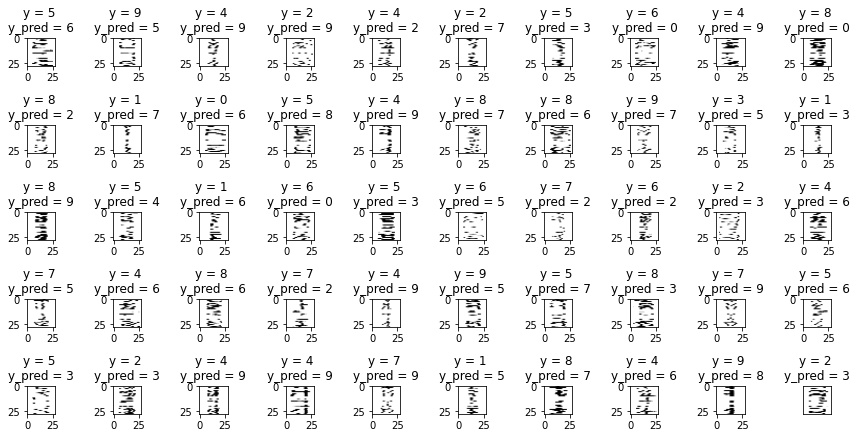

In [36]:
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(x_rdm_test),axis=-1)
errors = y_pred != y_test

plt.figure(figsize=(12,12))
for idx in range(50):
  plt.subplot(10,10,idx+1)
  x = x_rdm_test [errors][idx].reshape(28,28)
  y = y_test[errors][idx]

  plt.gcf().set_facecolor('w')
  plt.tight_layout()
  plt.imshow(x,cmap=plt.cm.gray_r);
  plt.title(f'y = {y} \ny_pred = {y_pred[errors][idx]}')

plt.xticks([]);
plt.yticks([]);

Resposta 7.2.12: Pode-se concluir, através dos resultados similares obtidos mesmo após a permutação aleatória dos pixels, que a aprendizagem do modelo, diferentemente da aprendizagem humana nãoreconhece formas
Entende-se que o modelo foca, na realidade em encontrar features mais sutis. Isso mostra também como o aprendizado de máquina é sujeito a julgar como certos padrões que são totalmente diferentes dos esperados como resposta assetiva do modelo.